In [132]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [133]:
point_deviation_table = np.zeros((4, 9));
mouse_cnt = np.zeros((4, 9));
point_latancy_table = np.zeros((4, 9));
click_count = np.zeros(4);

jitter_deviation_table = np.zeros(4);

voice_count = np.zeros(2);
latancy_move_box = np.zeros(2);
step_move_box = np.zeros(2);

survey_mouse = [[] for _ in range(9)]
survey_keyboard = [[] for _ in range(4)]

mouse_questions = [
    "Có tốn nhiều thời gian để thành thạo ứng dụng không",
    "Việc nhấn trái/phải chuột phản hồi có nhanh không",
    "Việc di chuột có phản hồi nhanh không",
    "Việc nhấn trái/ phải chuột có khó không",
    "Để di chuyển chuột chính xác có khó không",
    "Việc di chuột theo hướng dọc có khó không",
    "Việc di chuột theo hướng ngang có khó không",
    "Việc di chuyển chuột có gây mỏi không",
    "Bạn đánh giá có thể ứng dụng chuột này cho người khuyết tật không"
]
keyboard_questions = [
    "Việc ấn nút có khó không",
    "Việc ấn nút độ trễ cao không",
    "Việc ấn nút có dễ bị nhầm không",
    "Liệu có thể ứng dụng việc ấn nút này hỗ trợ người khuyết tật tương tác nhanh không"
]

game_win = np.zeros(2);
for file in os.listdir("data"):
    if file.endswith(".json"):
        with open(os.path.join("data", file), "r", encoding="utf-8") as f:
            # Data bảng point
            data = json.load(f)
            data = data["app_details"]
            for id, method in enumerate([
                    "farid_karimli_et_al_mouse_movement", 
                    "project_gameface_-_google_mouse_movement", 
                    "our_method_mouse_movement", 
                    "use_mouse_mouse_movement"
                ]):
                recent_data_method = data[method]["points"]
                for i in range(8):
                    mouse_cnt[id, i] += 1
                    point_deviation_table[id, i] += recent_data_method[i]["deviation"]
                    click_count[id] += recent_data_method[i]["click_count"]
                    point_latancy_table[id, i] += recent_data_method[i]["time"]
                point_latancy_table[id, 8] += data[method]["total_time"]
                mouse_cnt[id, 8] += 1
                point_deviation_table
                click_count[id] -= 8
            # Data jitter
            for id, method in enumerate([
                    "farid_karimli_et_al_mouse_jitter", 
                    "project_gameface_-_google_mouse_jitter", 
                    "our_method_mouse_jitter", 
                    "use_mouse_mouse_jitter"
                ]):
                recent_data_method = data[method]
                jitter_deviation_table[id] += recent_data_method["deviation"]
            if "no_voice" not in file:
                # Data bảng move box
                for id, method in enumerate([
                        "our_method_move_box", 
                        "use_keyboard_move_box"
                    ]):
                    recent_data_method = data[method]
                    latancy_move_box[id] += recent_data_method["time"]
                    step_move_box[id] += recent_data_method["step_count"]
                    voice_count[id] += 1
                # Data bảng ping pong
                for id, method in enumerate([
                        "our_method_ping_pong", 
                        "use_keyboard_ping_pong"
                    ]):
                    recent_data_method = data[method]
                    game_win[id] += recent_data_method["total_wins"]
            # Data survey
            individual_survey = data["0_survey"]["responses"]
            individual_survey_mouse = individual_survey["mouse"]
            individual_survey_keyboard = individual_survey["keyboard"]
            for key, value in individual_survey_keyboard.items():
                survey_keyboard[keyboard_questions.index(key)].append(value)
            for key, value in individual_survey_mouse.items():
                survey_mouse[mouse_questions.index(key)].append(value)

            if "no_voice" in file:
                data["our_method_move_box"] = {}
                data["our_method_ping_pong"] = {}
                data["use_keyboard_move_box"] = {}
                data["use_keyboard_ping_pong"] = {}

point_deviation_table = point_deviation_table / mouse_cnt
point_latancy_table = point_latancy_table / mouse_cnt
jitter_deviation_table = jitter_deviation_table / mouse_cnt[:, 0]
point_deviation_table[:, 8] = np.mean(point_deviation_table[:, :8], axis=1)
latancy_move_box = latancy_move_box / voice_count
step_move_box = step_move_box / voice_count
game_win = game_win / voice_count

survey_keyboard = np.array(survey_keyboard)
survey_mouse = np.array(survey_mouse)
mean_survey_keyboard = np.mean(survey_keyboard, axis=1)
mean_survey_mouse = np.mean(survey_mouse, axis=1)
std_survey_keyboard = np.std(survey_keyboard, axis=1)
std_survey_mouse = np.std(survey_mouse, axis=1)

print("Point Deviation Table:")
print(point_deviation_table)
print("Click Count:")
print(click_count)
print("Point Latency Table:")
print(point_latancy_table)
print("Jitter Deviation Table:")
print(jitter_deviation_table)
print("Latency Move Box:")
print(latancy_move_box)
print("Step Move Box:")
print(step_move_box)
print("Game Win:")
print(game_win)
print("mean_survey_keyboard:")
print(mean_survey_keyboard)
print("std_survey_keyboard:")
print(std_survey_keyboard)
print("mean_survey_mouse:")
print(mean_survey_mouse)
print("std_survey_mouse:")
print(std_survey_mouse)

Point Deviation Table:
[[52.43758343 65.97087694 62.1997138  31.48737017 64.2477026  20.50064003
  35.40645354 32.98371228 45.6542566 ]
 [63.78604793 47.80267566 35.7567032  26.76871749 35.30384831 28.75231401
  27.64676498 24.47081942 36.28598637]
 [17.78951843 49.56949421 38.41447138 20.43314382 29.06876615 14.04142864
  29.56135816 18.56937686 27.18094471]
 [29.63442398 36.60191566 34.42181577 16.19183289 25.38590008 13.05534414
  18.0462024  22.20952706 24.44337025]]
Click Count:
[136.  59.  26.   6.]
Point Latency Table:
[[ 2.98834187  5.31737551  3.31807822  6.26289445  7.07006651  4.28403208
   5.98645926  2.87186602 38.1024437 ]
 [ 2.25899467  2.68655017  2.72023875  5.39474973  2.62287155  2.86597177
   3.12026665  2.22379905 23.89810652]
 [ 1.85212469  2.55045664  2.09915307  2.23985782  2.43314883  3.84967148
   2.68558982  2.48250413 20.19548514]
 [ 1.08373091  1.37813312  0.97905818  1.16511938  0.94897157  0.97202811
   1.09433657  1.0436846   8.66872892]]
Jitter Deviatio

# Average Deviation from Optimal Path

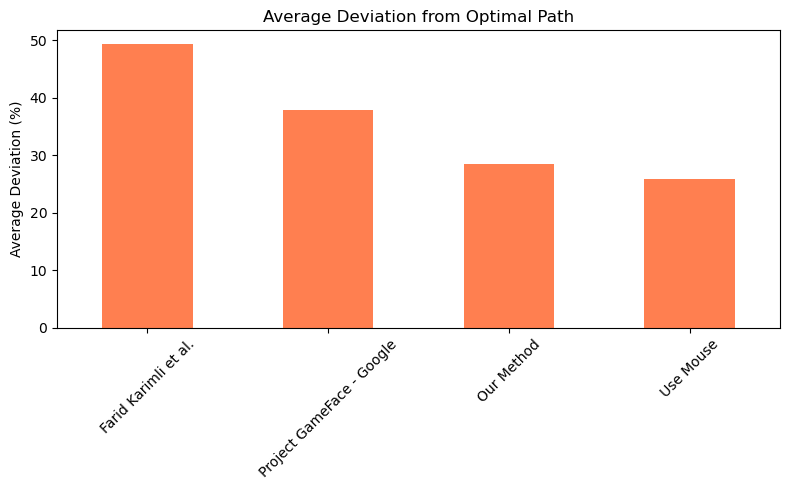

In [134]:
import matplotlib.pyplot as plt

# Lấy giá trị trung bình độ lệch
avg_deviation = point_deviation_table_dataframe["Average"]

# Vẽ biểu đồ cột
avg_deviation.plot(kind='bar', color='coral', figsize=(8, 5))
plt.ylabel("Average Deviation (%)")
plt.title("Average Deviation from Optimal Path")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Average Movement Latency per Step by System

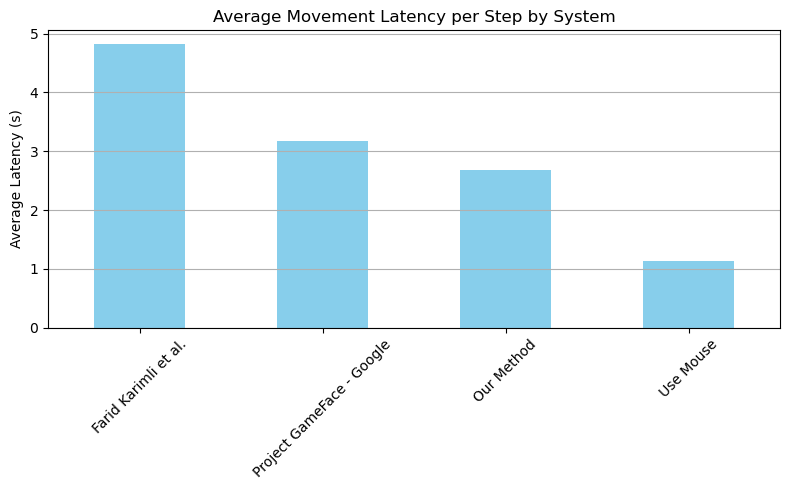

In [135]:
import matplotlib.pyplot as plt

# Tính trung bình latency từ cột "Total"
avg_latency = point_latency_table_dataframe["Total"] / 8

# Vẽ biểu đồ cột
avg_latency.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.ylabel("Average Latency (s)")
plt.title("Average Movement Latency per Step by System")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Click count

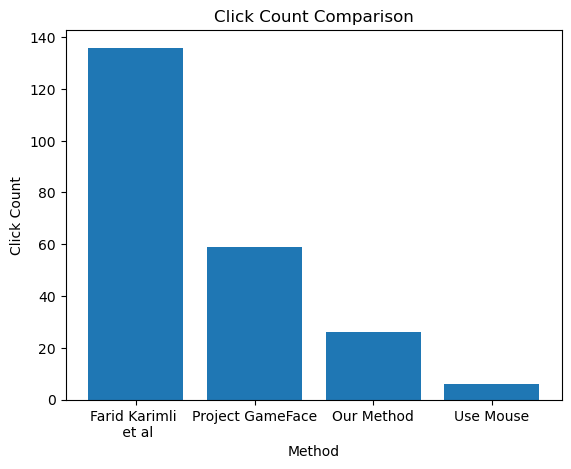

In [136]:
plt.bar(np.arange(4), click_count, tick_label=[
    "Farid Karimli \n et al",
    "Project GameFace",
    "Our Method",
    "Use Mouse"
])
plt.xlabel("Method")
plt.ylabel("Click Count")
plt.title("Click Count Comparison")
plt.show()

# Jitter Deviation Comparison

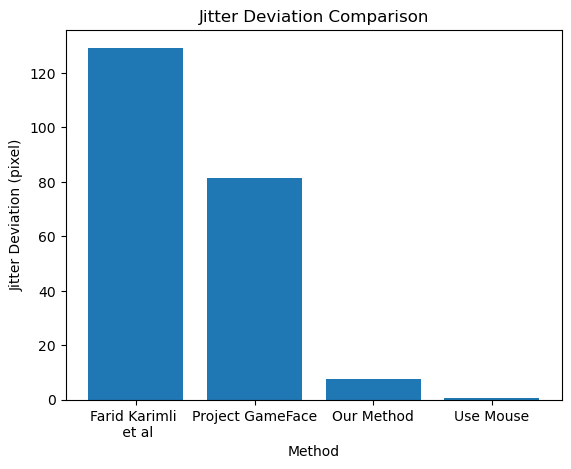

In [137]:
plt.bar(np.arange(4), jitter_deviation_table, tick_label=[
    "Farid Karimli \n et al",
    "Project GameFace",
    "Our Method",
    "Use Mouse"
])
plt.xlabel("Method")
plt.ylabel("Jitter Deviation (pixel)")
plt.title("Jitter Deviation Comparison")
plt.show()

Move box (with voice) Latency

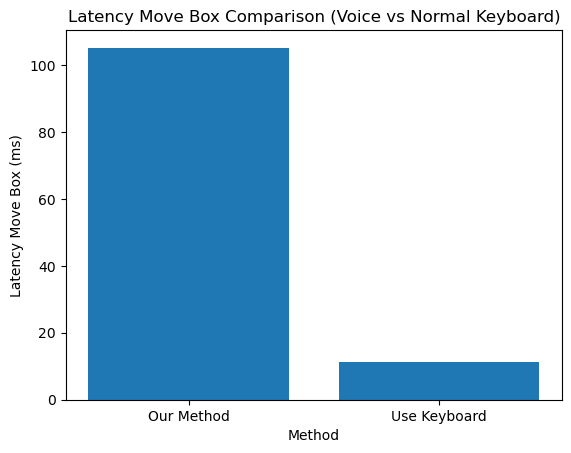

In [144]:
plt.bar(np.arange(2), latancy_move_box, tick_label=[
    "Our Method",
    "Use Keyboard"
])
plt.xlabel("Method")
plt.ylabel("Latency Move Box (ms)")
plt.title("Latency Move Box Comparison (Voice vs Normal Keyboard)")
plt.show()

# Number of box moving step

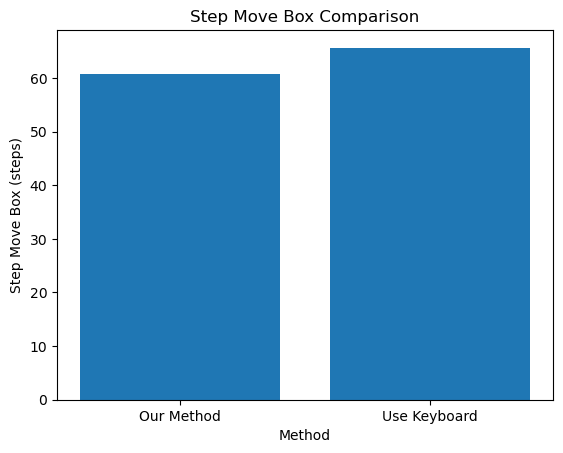

In [139]:
plt.bar(np.arange(2), step_move_box, tick_label=[
    "Our Method",
    "Use Keyboard"
])
plt.xlabel("Method")
plt.ylabel("Step Move Box (steps)")
plt.title("Step Move Box Comparison")
plt.show()

# Số lượng game thắng trung bình

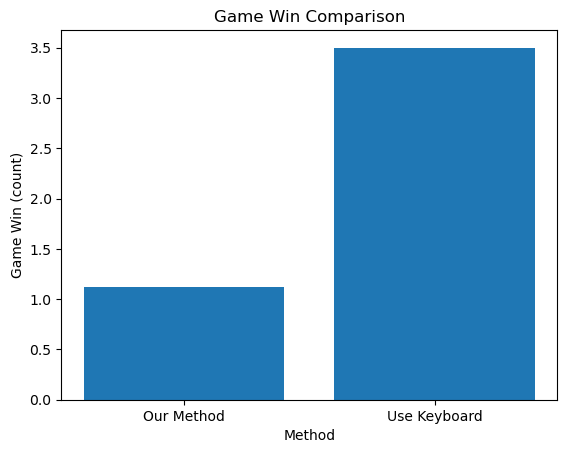

In [140]:
plt.bar(np.arange(2), game_win, tick_label=[
    "Our Method",
    "Use Keyboard"
])
plt.xlabel("Method")
plt.ylabel("Game Win (count)")
plt.title("Game Win Comparison")
plt.show()

In [141]:
survey_keyboard_dataframe = pd.DataFrame(np.array([mean_survey_keyboard, std_survey_keyboard]).T,
                  index=keyboard_questions,
                  columns=["mean", "std"],
)

survey_keyboard_dataframe.head()

,mean,std
Việc ấn nút có khó không,4.875,2.087912
Việc ấn nút độ trễ cao không,5.750,2.861381
Việc ấn nút có dễ bị nhầm không,5.500,2.783882
Liệu có thể ứng dụng việc ấn nút này hỗ trợ người khuyết tật tương tác nhanh không,8.125,2.976470


# Mean survey about mouse

In [142]:
survey_mouse_mean_dataframe = pd.DataFrame(mean_survey_mouse,
                    index=mouse_questions,
                    columns=[
                        "Farid Karimli \n et al",
                        "Project GameFace",
                        "Our Method",
                        "Use Mouse"
                    ])
from googletrans import Translator

# Khởi tạo translator
translator = Translator()

# Dịch từng câu hỏi trong index (cột tiếng Việt)
translated_questions = []
for question in survey_mouse_mean_dataframe.index:
    try:
        translated = translator.translate(question, src='vi', dest='en').text
    except Exception as e:
        translated = "TRANSLATION ERROR"
        print(f"Error translating: {question} -> {e}")
    translated_questions.append(translated)

# Chèn vào cột mới thứ 2
survey_mouse_mean_dataframe.insert(
    loc=1,  # sau cột index
    column="Translated Question",
    value=translated_questions
)

# Hiển thị 10 dòng đầu tiên
print(survey_mouse_mean_dataframe.head(10))

print(survey_mouse_mean_dataframe.head(100))

                                                    Farid Karimli \n et al  \
Có tốn nhiều thời gian để thành thạo ứng dụng k...                   3.875   
Việc nhấn trái/phải chuột phản hồi có nhanh không                    3.500   
Việc di chuột có phản hồi nhanh không                                5.375   
Việc nhấn trái/ phải chuột có khó không                              4.625   
Để di chuyển chuột chính xác có khó không                            4.125   
Việc di chuột theo hướng dọc có khó không                            4.625   
Việc di chuột theo hướng ngang có khó không                          4.625   
Việc di chuyển chuột có gây mỏi không                                2.250   
Bạn đánh giá có thể ứng dụng chuột này cho ngườ...                   3.875   

                                                                                  Translated Question  \
Có tốn nhiều thời gian để thành thạo ứng dụng k...        Is it time to be proficient in application?   
Việc nhấn

# Std của survey về mouse

In [143]:
survey_mouse_std_dataframe = pd.DataFrame(std_survey_mouse,
                    index=mouse_questions, 
                    columns=[
                        "Farid Karimli \n et al",
                        "Project GameFace",
                        "Our Method",
                        "Use Mouse"
                    ])
from googletrans import Translator

# Khởi tạo translator
translator = Translator()

# Dịch từng câu hỏi trong index (cột tiếng Việt)
translated_questions = []
for question in survey_mouse_std_dataframe.index:
    try:
        translated = translator.translate(question, src='vi', dest='en').text
    except Exception as e:
        translated = "TRANSLATION ERROR"
        print(f"Error translating: {question} -> {e}")
    translated_questions.append(translated)

# Chèn vào cột mới thứ 2
survey_mouse_std_dataframe.insert(
    loc=1,  # sau cột index
    column="Translated Question",
    value=translated_questions
)

# Hiển thị 10 dòng đầu tiên
print(survey_mouse_std_dataframe.head(10))

                                                    Farid Karimli \n et al  \
Có tốn nhiều thời gian để thành thạo ứng dụng k...                2.204399   
Việc nhấn trái/phải chuột phản hồi có nhanh không                 2.345208   
Việc di chuột có phản hồi nhanh không                             2.057760   
Việc nhấn trái/ phải chuột có khó không                           2.825664   
Để di chuyển chuột chính xác có khó không                         2.847696   
Việc di chuột theo hướng dọc có khó không                         2.232571   
Việc di chuột theo hướng ngang có khó không                       2.232571   
Việc di chuyển chuột có gây mỏi không                             1.198958   
Bạn đánh giá có thể ứng dụng chuột này cho ngườ...                3.479853   

                                                                                  Translated Question  \
Có tốn nhiều thời gian để thành thạo ứng dụng k...        Is it time to be proficient in application?   
Việc nhấn